# PCA 

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io  
from sklearn.decomposition import PCA
import glob 

i = 0
os.mkdir('PCA') 
path = "resized/*.jpeg*"
for image in glob.glob(path):
    img = io.imread(image)
    img = img.astype(np.uint8)
    print(img.shape)
#    plt.imshow(img, cmap="gray") 
    tswizzle_pca = PCA(n_components=50).fit(img)
    transformed = tswizzle_pca.transform(img)
    projected = tswizzle_pca.inverse_transform(transformed)
    print(transformed.shape)
#    plt.imshow(projected, cmap="gray")
    
    io.imsave("PCA/image%05i.jpeg" %i, img)
    i += 1

(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(2

(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(25

(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(25

(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(2

(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(2

(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(25

(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(2

(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(25

(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(2

(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(25

(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(256, 50)
(256, 256)
(2

## PCA for color images

In [1]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

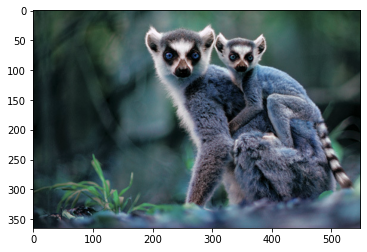

In [2]:
# Loading the image 
img = cv2.imread('train1/ILSVRC2012_val_00005026.JPEG') #you can use any image you want.
plt.imshow(img)

In [3]:
# Splitting the image in R,G,B arrays.
 
blue,green,red = cv2.split(img) 
#it will split the original image into Blue, Green and Red arrays.

In [4]:
#initialize PCA with first 20 principal components
pca = PCA(200)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)


In [5]:
img_compressed = (np.dstack((blue_inverted, green_inverted, red_inverted))).astype(np.uint8)

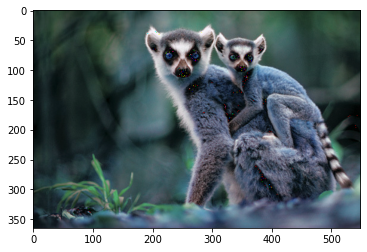

In [6]:
#viewing the compressed image
plt.imshow(img_compressed)